
Best solution found: [ 1.08363667e-02 -1.64865882e-02 -3.83071402e-02  2.06822188e-02
 -1.04621180e-02  4.37174505e-03 -7.90841819e-03  1.38484916e-02
  1.98688177e-02 -7.73132465e-03 -1.09780527e-02 -2.56258271e-02
  2.43331403e-02 -1.54676279e-03  3.53188031e-02 -2.69940800e-02
 -4.66018340e-02 -1.73184853e-02 -7.82071543e-03  2.62371323e-02
 -3.79451360e-02  9.76449179e-03  3.94862751e-03 -2.96897734e-02
 -5.62471430e-03  3.42748167e-02 -3.18773931e-02  2.00970075e-02
  1.38922150e-02  1.76218904e-02 -1.87186718e-05  2.60721413e-02
 -1.30842045e-02 -6.97063250e-03 -1.85891056e-02 -2.12640874e-02
  5.12910746e-02 -1.07429461e-02  1.05283162e-02  4.55089868e-03
 -1.93784425e-02 -1.15235547e-03  6.06495730e-03  4.60624649e-03
  2.83860209e-03  1.79190095e-02  5.16821096e-04  1.00779841e-02
  1.58801727e-02 -2.23190153e-02]
Fitness value: 4.2384


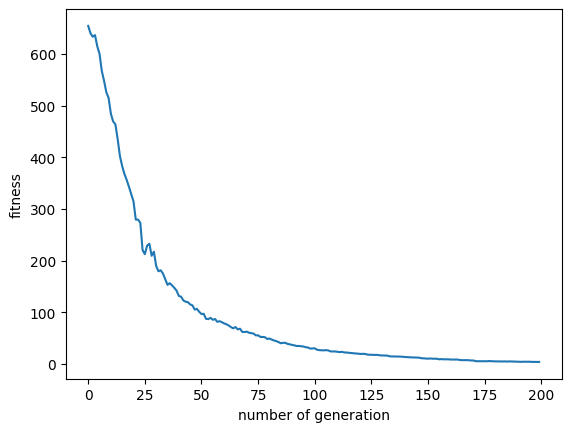

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 1000   # Number of individuals in each generation
num_parents = 500        # Number of parents selected to breed
num_variables = 50        # Number of parameters to optimize (dimensions for Rastrigin)
num_generations = 200    # Number of generations
crossover_rate = 0.8     # Probability of crossover
mutation_rate = 0.01     # Probability of mutation
mutation_range = 1       # Range of mutation

# Range for Rastrigin function variables (-5.12 to 5.12 for each variable)
variable_range = (-5.12, 5.12)

# Initialize population with random real numbers within the range
population = np.random.uniform(variable_range[0], variable_range[1], size=(population_size, num_variables))

def rastrigin(x): 
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def calculate_fitness(population):
    fitness = np.array([rastrigin(individual) for individual in population])
    return fitness

def crossover(parents, crossover_rate, population_size):
    num_parents = parents.shape[0]
    num_variables = parents.shape[1]

    offspring_population = np.zeros((population_size, num_variables))
    current_count = 0

    while current_count < population_size:
        shuffled_indices = np.random.permutation(num_parents)
        shuffled_parents = parents[shuffled_indices, :]

        for i in range(0, num_parents, 2):
            if current_count >= population_size:
                break

            if i == num_parents - 1:
                offspring_population[current_count, :] = shuffled_parents[i, :]
                current_count += 1
            else:
                parent1 = shuffled_parents[i, :]
                parent2 = shuffled_parents[i + 1, :]

                if np.random.rand() < crossover_rate:
                    crossover_point = np.random.randint(1, num_variables)
                    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
                else:
                    offspring1 = parent1
                    offspring2 = parent2

                offspring_population[current_count, :] = offspring1
                current_count += 1

                if current_count < population_size:
                    offspring_population[current_count, :] = offspring2
                    current_count += 1

    return offspring_population

def mutate(new_population, mutation_rate, mutation_range):
    population_size = new_population.shape[0]
    num_variables = new_population.shape[1]

    mutated_population = new_population.copy()

    for i in range(population_size):
        for j in range(num_variables):
            if np.random.rand() < mutation_rate:
                mutation_value = (np.random.rand() - 0.5) * 2 * mutation_range
                mutated_population[i, j] = mutated_population[i, j] + mutation_value
                mutated_population[i, j] = max(variable_range[0], min(variable_range[1], mutated_population[i, j]))

    return mutated_population

fit_plot = np.zeros(num_generations)

for i in range(num_generations):
    fitness = calculate_fitness(population)
    parents = population[np.argsort(fitness)[:num_parents]]         # min :numparents  max -num_parents:
#    parents = population[np.argsort(fitness)[-num_parents:]]

    offspring_population = crossover(parents, crossover_rate, population_size)
    population = mutate(offspring_population, mutation_rate, mutation_range)

    best_fitness = np.min(fitness)  # min / max 
    fit_plot[i] = best_fitness
   # print(f"Generation {generation}: Best Fitness = {best_fitness:.4f}")


plt.plot(fit_plot)
plt.ylabel("fitness")
plt.xlabel("number of generation")
best_solution = population[np.argmin(fitness)]
print(f"\nBest solution found: {best_solution}")
print(f"Fitness value: {rastrigin(best_solution):.4f}")
